# Sujet 6 : Autour du Paradoxe de Simpson

## Contexte de l'étude

Cette étude porte sur le [Paradoxe de Simpson](https://fr.wikipedia.org/wiki/Paradoxe_de_Simpson) (Simpson 1951, Undy 1903). Ce paradoxe est un paradoxe statistique "dans lequel un phénomène observé de plusieurs groupes semble s'inverser lorsque les groupes sont combinés. Ce résultat qui semble impossible au premier abord est lié à des éléments qui ne sont pas pris en compte (comme la présence de variables non indépendantes ou de différences d'effectifs entre les groupes, etc.) est souvent rencontré dans la réalité, en particulier dans les sciences sociales et les statistiques médicales" (Wikipédia). 

Pour représenter ce paradoxe, on utilisera les données d'un sondage des années 1970 d'une ville du nord-est de l'Angleterre sur un sixième des électeurs, complété par une seconde étude 20 ans plus tard (Vanderpump et al. 1995) sur les mêmes personnes. Le sondage initial avait été réalisé afin d'expliciter les travaux sur les maladies thyroïdiennes et cardiaques (Tunbridge et al. 1977). Le second sondage avait pour objectif de savoir si les individus étaient envore en vie, notamment au vu de leur tabagisme.

Pour ce MOOC : "Nous nous restreindrons aux femmes et parmi celles-ci aux 1314 qui ont été catégorisées comme "fumant
actuellement" ou "n'ayant jamais fumé". Il y avait relativement peu de femmes dans le sondage initial ayant fumé et ayant arrêté depuis (162) et très peu pour lesquelles l'information n'était pas disponible (18). La survie à 20 ans a été déterminée pour l'ensemble des femmes du premier sondage" (MOOC Recherche Reproductible).

## Importation des librairies python

In [48]:
import os
import urllib.request
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

## Traitement des données

Les donnés sont disponibles sur le GitLab du MOOC Reproductibilité. Par soucis d'accessibilité et pour éviter toute disparition de données suite à la fermeture du MOOC, on enregistrera les données récupérées de manière locale. Elles seront uniquement téléchargées si la copie locale n'existe pas.


In [6]:
data_url = 'https://gitlab.inria.fr/learninglab/mooc-rr/mooc-rr-ressources/-/raw/master/module3/Practical_session/Subject6_smoking.csv?inline=false'
data_file = 'simpson_paradox.csv'

if not os.path.exists(data_file):
    urllib.request.urlretrieve(data_url, data_file)

Chaque ligne des données représente une personne avec comme information:
- Si la personne fume (Yes/No)
- Si elle est vivante ou morte au moment de la 2ème étude (Alive/Dead)
- Son âge au 1er sondage (arrondi à la 1ère décimale)

In [7]:
data = pd.read_csv(url)
data

Smoker Status   Age
0       Yes  Alive  21.0
1       Yes  Alive  19.3
2        No   Dead  57.5
3        No  Alive  47.1
4       Yes  Alive  81.4
5        No  Alive  36.8
6        No  Alive  23.8
7       Yes   Dead  57.5
8       Yes  Alive  24.8
9       Yes  Alive  49.5
10      Yes  Alive  30.0
11       No   Dead  66.0
12      Yes  Alive  49.2
13       No  Alive  58.4
14       No   Dead  60.6
15       No  Alive  25.1
16       No  Alive  43.5
17       No  Alive  27.1
18       No  Alive  58.3
19      Yes  Alive  65.7
20       No   Dead  73.2
21      Yes  Alive  38.3
22       No  Alive  33.4
23      Yes   Dead  62.3
24       No  Alive  18.0
25       No  Alive  56.2
26      Yes  Alive  59.2
27       No  Alive  25.8
28       No   Dead  36.9
29       No  Alive  20.2
...     ...    ...   ...
1284    Yes   Dead  36.0
1285    Yes  Alive  48.3
1286     No  Alive  63.1
1287     No  Alive  60.8
1288    Yes   Dead  39.3
1289     No  Alive  36.7
1290     No  Alive  63.8
1291     No   Dead  71.3
1292     No  Alive  57.7
1293     No  Alive  63.2
1294     No  Alive  46.6
1295    Yes   Dead  82.4
1296    Yes  Alive  38.3
1297    Yes  Alive  32.7
1298     No  Alive  39.7
1299    Yes   Dead  60.0
1300     No   Dead  71.0
1301     No  Alive  20.5
1302     No  Alive  44.4
1303    Yes  Alive  31.2
1304    Yes  Alive  47.8
1305    Yes  Alive  60.9
1306     No   Dead  61.4
1307    Yes  Alive  43.0
1308     No  Alive  42.1
1309    Yes  Alive  35.9
1310     No  Alive  22.3
1311    Yes   Dead  62.1
1312     No   Dead  88.6
1313     No  Alive  39.1

[1314 rows x 3 columns]

On vérifir que toutes nos lignes sont bien remplies et que les âges sont cohérents

In [10]:
 data[data.isnull().any(axis=1)]

Empty DataFrame
Columns: [Smoker, Status, Age]
Index: []

In [11]:
print('Ages minimaux et maximaux: ' + str([data.Age.min(), data.Age.max()]))

Ages minimaux et maximaux: [18.0, 89.9]


## Etudes

### Décès en fonction des habitudes de tabagisme

Le tableau suivant récapitule le nombre de femmes mortes ou vivantes selon sa relation au tabac.

In [22]:
data_death = pd.DataFrame(index=['Smoker', 'Non-smoker'], columns=['Alive', 'Dead'], data=[data[data.Smoker == 'Yes']['Status'].value_counts(), data[data.Smoker == 'No']['Status'].value_counts()])
data_death['Mortality'] = round(data_death['Dead'] / (data_death['Dead'] + data_death['Alive']), 3)  
data_death

Alive  Dead  Mortality
Smoker        443   139      0.239
Non-smoker    502   230      0.314

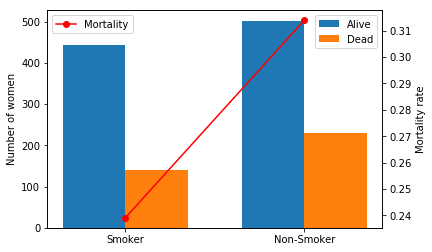

In [66]:
x = np.arange(2)  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
ax.bar(x - width/2, data_death['Alive'], width, label='Alive')
ax.bar(x + width/2, data_death['Dead'], width, label='Dead')
ax2 = ax.twinx()
ax2.plot(x, data_death['Mortality'], color='r', marker='o', label='Mortality')

ax.set_ylabel('Number of women')
ax2.set_ylabel('Mortality rate')
ax.set_xticks(x)
ax.set_xticklabels(['Smoker', 'Non-Smoker'])
ax.legend()
ax2.legend()

A partir de ces graphiques et résultats il serait logique de conclure que les non fumeuses ont une mortalité plus importante (31%) par rapport aux fumeuses (24%) et que donc fumer aide à vivre longtemps. Même en regardant les intervales de confiance sur la condition (morte **0** ou vivante **1**) de la personne suivant son statut de fumeur nous indique que les fumeurs ont plus de chance de survie.

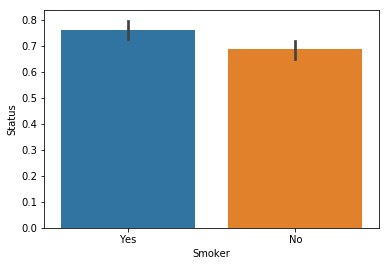

In [79]:
sns.barplot(x='Smoker', y='Status', ci=95, data=data.replace('Alive', 1).replace('Dead', 0))

Mais est-ce vraiment le cas ? Nous avons regardé les données de manière globale sans rentrer dans les détails. Si l'on regarde l'âge des femmes suivant leur statut de fumeur un paradoxe commence à apparaître:

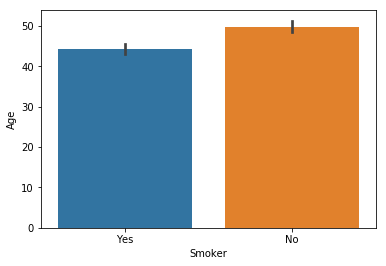

In [82]:
sns.barplot(x='Smoker', y='Age', ci=95, data=data)

La prochaine étape est donc d'étudier les données plus précisément, notamment suivant les tranches d'âges.

## Décès liés au tabagisme suivant l'âge

